In [1]:
import test_config as cfg
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import os, os.path
import pickle
import io

import skimage
import skimage.io, skimage.transform

import sys
sys.path.append(r'../src/')

In [2]:
import importlib
import transform
importlib.reload(transform)

<module 'transform' from '../src\\transform.py'>

In [152]:
src_fname = os.path.join(cfg.sample_path, os.listdir(cfg.sample_path)[7])
print(src_fname)
src = skimage.io.imread(src_fname, as_grey=True)

D:/Data/bujo_sample\20190309_125153.jpg


C:\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


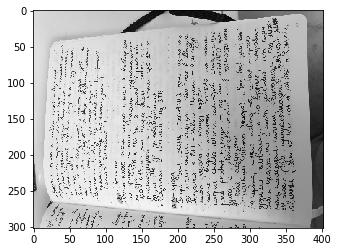

In [153]:
src2 = skimage.transform.rescale(src, scale=0.1)
plt.imshow(src2, cmap='gray')

In [154]:
res = transform.get_text_angle(src2)
print(res[0][0])

C:\Anaconda3\lib\site-packages\skimage\transform\radon_transform.py:69: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


1.1166253101737027


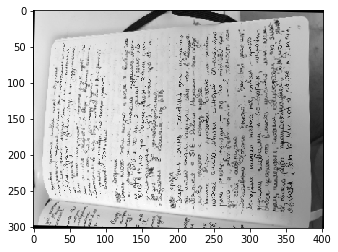

In [155]:
src3 = skimage.transform.rotate(src2, -res[0][0])
plt.imshow(src3, cmap='gray')

In [156]:
src3v = np.sum(np.abs(src3[1:,:]-src3[:-1,:]), axis=0)

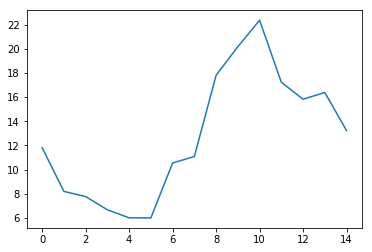

In [157]:
plt.plot(src3v[115:130])

In [164]:
tmp = np.correlate(src3v, src3v, mode='full')
tmp2 = tmp[(len(src3v)-1):]

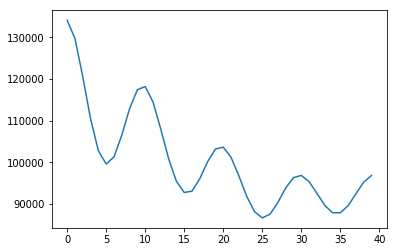

In [159]:
plt.plot(tmp2[:40])

In [160]:
tmp = np.fft.fft(src3v)
tmp2 = np.real(tmp)**2 + np.imag(tmp)**2

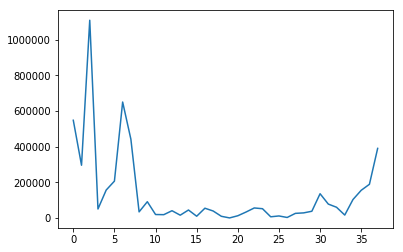

In [161]:
plt.plot(tmp2[2:40])

In [165]:
loc_maximas = np.array(range(len(tmp2)))[np.r_[True, tmp2[1:] > tmp2[:-1]] & np.r_[tmp2[:-1] > tmp2[1:], True]]
best_freq = min([x for x in loc_maximas if x > 0])

In [166]:
best_freq

10

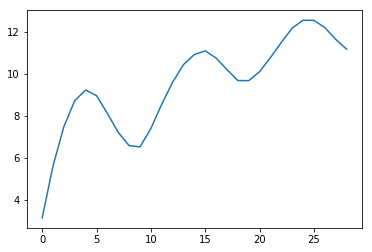

In [168]:
plt.plot([np.mean(np.abs(src3v[i:]-src3v[:-i])) for i in range(1, 30)])

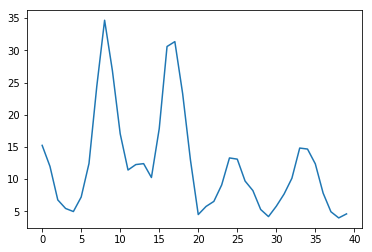

In [110]:
plt.plot(src3v[110:150])

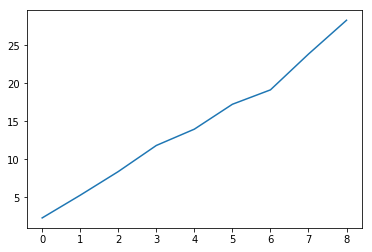

In [169]:
plt.plot(np.percentile(src3v, [10,20,30,40,50,60,70,80,90]))

In [170]:
np.mean(src3v), np.median(src3v)

(15.124640606416063, 13.961615512138737)

In [171]:
src4 = src3v - np.median(src3v)

In [172]:
loc_maximas = np.array(range(len(src4)))[np.r_[True, src4[1:] > src4[:-1]] & np.r_[src4[:-1] > src4[1:], True] & (src4 > 0)]

In [173]:
loc_maximas

array([ 33,  39,  41,  47,  53,  56,  61,  69,  77,  81,  84,  92,  96,
        99, 125, 128, 131, 136, 145, 152, 158, 160, 167, 175, 203, 212,
       222, 231, 241, 251, 260, 270, 280, 289, 302, 312, 322, 335, 344,
       354])

In [174]:
loc_maximas[1:]-loc_maximas[:-1]

array([ 6,  2,  6,  6,  3,  5,  8,  8,  4,  3,  8,  4,  3, 26,  3,  3,  5,
        9,  7,  6,  2,  7,  8, 28,  9, 10,  9, 10, 10,  9, 10, 10,  9, 13,
       10, 10, 13,  9, 10])

In [175]:
susp_maximas = [i for i in range(1, len(loc_maximas)-1) if np.abs(loc_maximas[i] - loc_maximas[i+1]) < best_freq*0.7 or np.abs(loc_maximas[i] - loc_maximas[i-1]) < best_freq*0.7]

In [176]:
wrong_maximas = [i for i in susp_maximas if src3v[loc_maximas[i]] < 0.4*np.max([src3v[loc_maximas[i-1]], src3v[loc_maximas[i+1]]])]

In [177]:
wrong_maximas

[]

In [178]:
fin_maximas = [x for x in loc_maximas if x not in wrong_maximas]

In [179]:
src_rot = skimage.transform.rotate(src, -res[0][0])

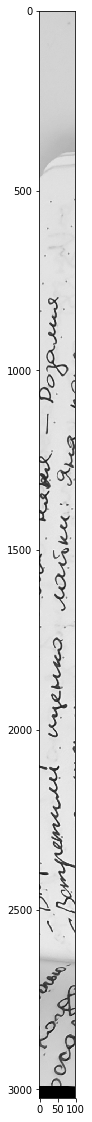

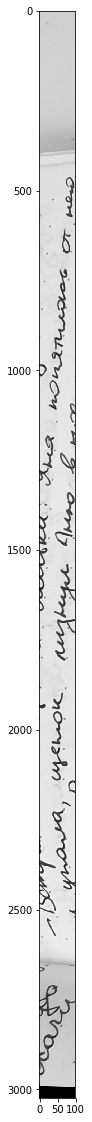

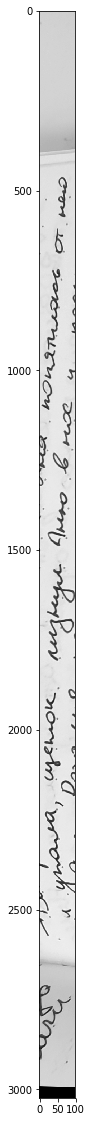

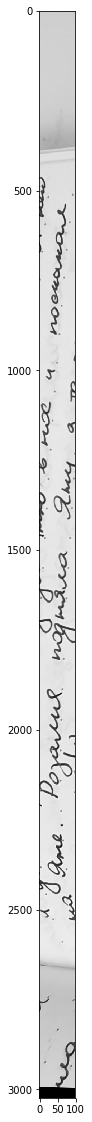

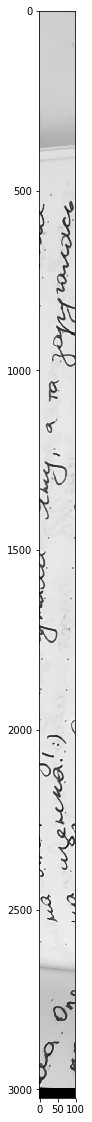

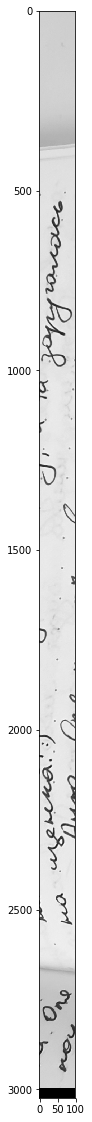

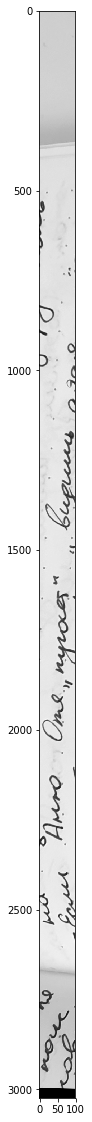

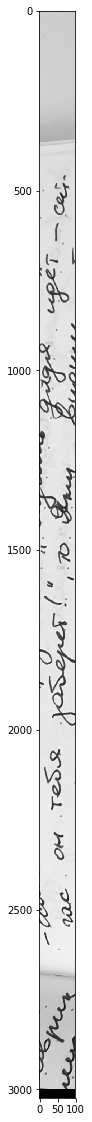

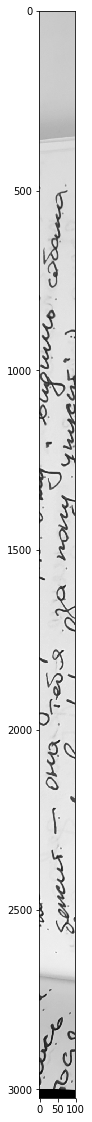

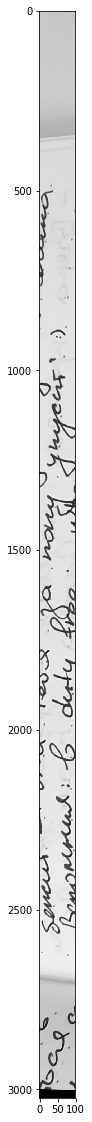

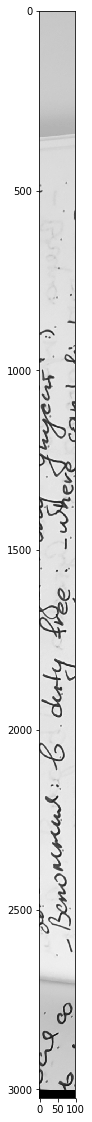

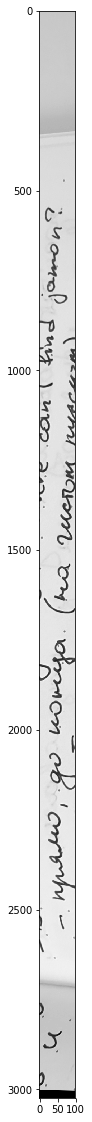

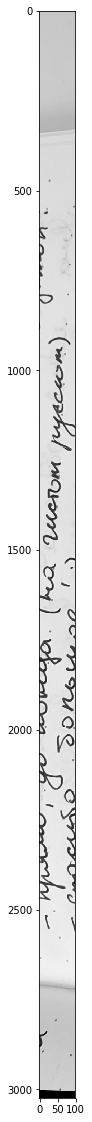

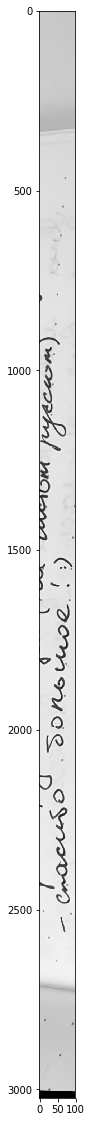

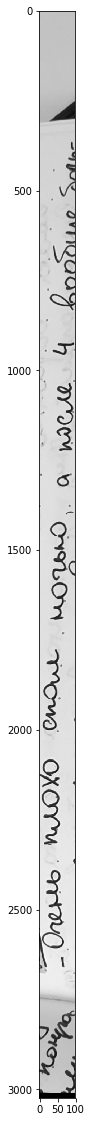

In [180]:
for i in fin_maximas[:15]:
    plt.figure(figsize = (2,20))
    plt.imshow(src_rot[:,(i-best_freq//2)*10:(i+best_freq//2)*10], cmap='gray')
    plt.show()